# Phân tích dữ liệu

Về Bộ dữ liệu
Bối cảnh
Đây là bộ dữ liệu sentiment140. Bộ dữ liệu này chứa 1.600.000 tweet được trích xuất bằng api twitter. Các tweet đã được chú thích (0 = tiêu cực, 4 = tích cực) và chúng có thể được sử dụng để phát hiện tình cảm.

Nội dung
Bộ dữ liệu này chứa 6 trường sau:

target: cực tính của tweet (0 = tiêu cực, 4 = tích cực)

ids: ID của tweet (2087)

date: ngày của tweet (Thứ bảy, ngày 16 tháng 5, 23:58:44 UTC năm 2009)

flag: Truy vấn (lyx). Nếu không có truy vấn nào, thì giá trị này là NO_QUERY.

user: người dùng đã tweet (robotickilldozr)

text: văn bản của tweet (Lyx thật tuyệt)

Lời cảm ơn
Liên kết chính thức liên quan đến tập dữ liệu với các tài nguyên về cách tạo ra tập dữ liệu này là tại đây
Bài báo chính thức nêu chi tiết về phương pháp tiếp cận là tại đây

Nguồn: https://www.kaggle.com/datasets/kazanova/sentiment140?select=training.1600000.processed.noemoticon.csv

# Nạp và chuẩn bị dữ liệu
Trước khi phân tích, cần nạp dữ liệu và thực hiện một số bước xử lý ban đầu như chuyển đổi định dạng, kiểm tra tính toàn vẹn dữ liệu. Bạn có thể sử dụng Python với các thư viện như pandas, numpy, và matplotlib để hỗ trợ.

In [1]:
import pandas as pd

# Nạp dữ liệu từ file CSV
df = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None) #thay đổi đường dẫn tới file dữ liệuliệu

# Đặt tên các cột theo mô tả của dataset
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']

# Xem qua dữ liệu
print(df.head())


   target         ids                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


# Kiểm tra và mô tả dữ liệu cơ bản
Kiểm tra kích thước của dữ liệu
Xem xét số lượng các nhãn (positive, neutral, negative)
Phân tích dữ liệu văn bản, tần suất từ, độ dài tweet, v.v.

In [2]:
# Kích thước của dữ liệu
print(f"Dataset shape: {df.shape}")

# Kiểm tra các giá trị phân bổ cho các nhãn (0 = negative, 2 = neutral, 4 = positive)
print(df['target'].value_counts())

# Kiểm tra xem có dữ liệu bị thiếu không
print(df.isnull().sum())


Dataset shape: (1600000, 6)
target
0    800000
4    800000
Name: count, dtype: int64
target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64


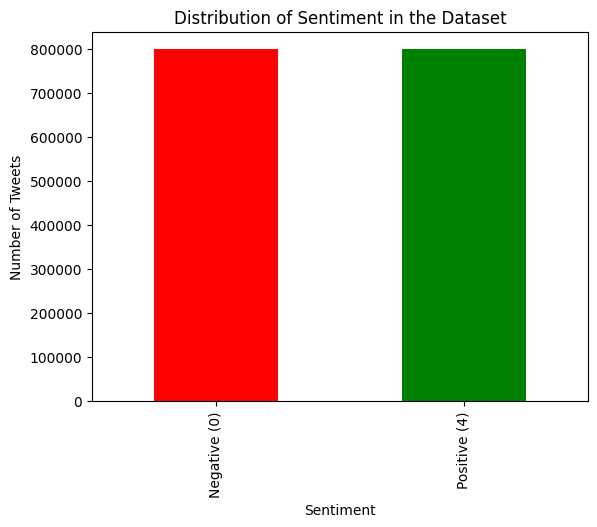

In [3]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ tần suất phân bổ của cảm xúc
df['target'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Distribution of Sentiment in the Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(ticks=[0, 1], labels=['Negative (0)', 'Positive (4)'])
plt.show()


Nhận xét tập dữ liệu: dữ liệu chỉ có 50% tiêu cực và 50% trung tính => nếu văn bản không thuộc 1 trong 2 tập dữ liệu này => trung lập.

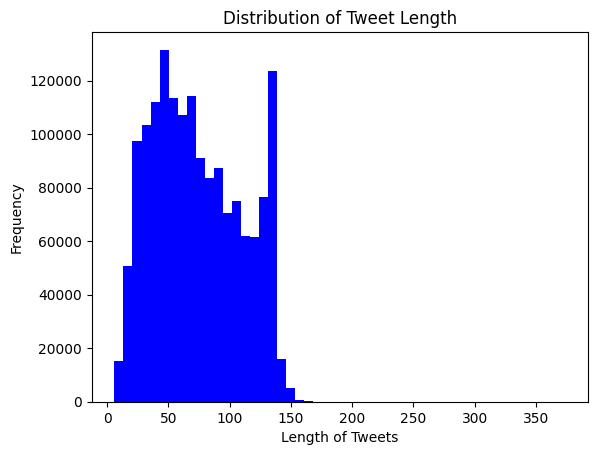

In [4]:
# Tính độ dài của từng tweet
df['tweet_length'] = df['text'].apply(len)

# Vẽ histogram cho độ dài tweet
df['tweet_length'].plot(kind='hist', bins=50, color='blue')
plt.title('Distribution of Tweet Length')
plt.xlabel('Length of Tweets')
plt.ylabel('Frequency')
plt.show()


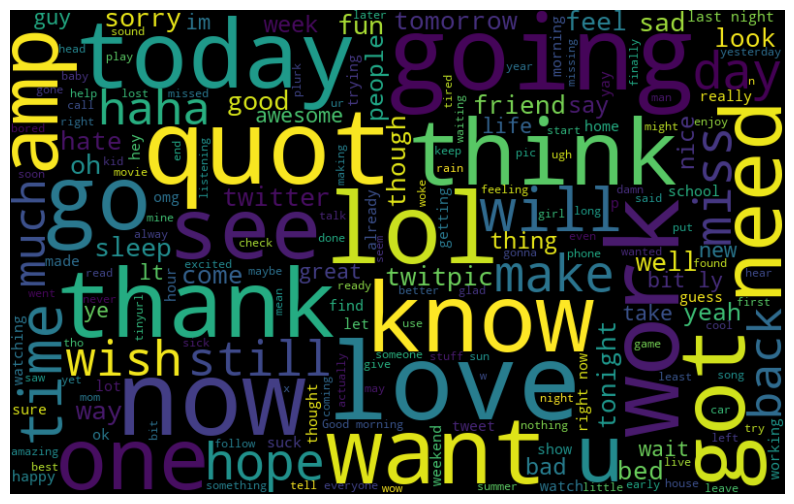

In [5]:
from wordcloud import WordCloud

# Kết hợp tất cả các tweet lại thành một chuỗi lớn
all_words = ' '.join([text for text in df['text']])

# Tạo WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


/tmp/ipykernel_18/4076184311.py:2: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['date'] = pd.to_datetime(df['date'])


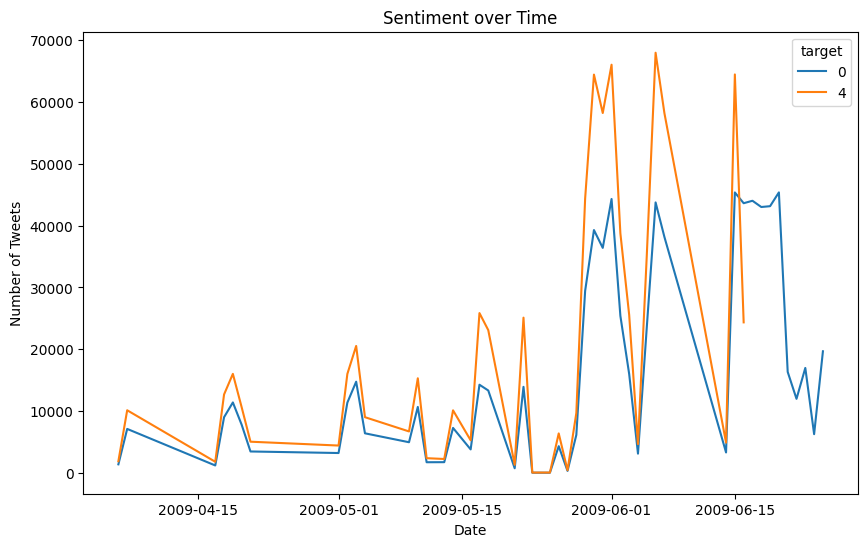

In [6]:
# Chuyển cột 'date' thành kiểu thời gian
df['date'] = pd.to_datetime(df['date'])

# Lọc và nhóm dữ liệu theo ngày, đếm số lượng cảm xúc
df.groupby([df['date'].dt.date, 'target']).size().unstack().plot(kind='line', figsize=(10,6))
plt.title('Sentiment over Time')
plt.ylabel('Number of Tweets')
plt.xlabel('Date')
plt.show()


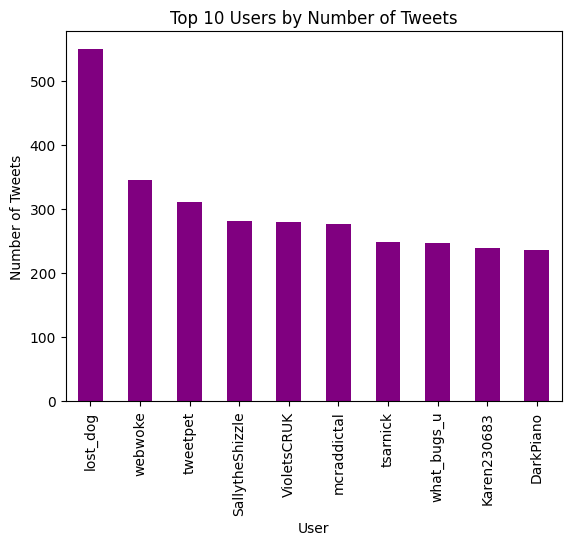

In [7]:
# Đếm số lượng tweet của mỗi user
top_users = df['user'].value_counts().head(10)

# Vẽ biểu đồ cho top 10 người dùng tweet nhiều nhất
top_users.plot(kind='bar', color='purple')
plt.title('Top 10 Users by Number of Tweets')
plt.xlabel('User')
plt.ylabel('Number of Tweets')
plt.show()


# TIẾP TỤC CÔNG VIỆC PHÂN TÍCH DỮ LIỆU 

In [8]:
# Tính toán các giá trị thống kê cho cột target (cảm xúc)
mean_val = df['target'].mean()
median_val = df['target'].median()
mode_val = df['target'].mode()[0]  # Lấy giá trị mode đầu tiên nếu có nhiều mode
std_dev_val = df['target'].std()  # Tính độ lệch chuẩn

# In ra các giá trị thống kê
print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
print(f"Mode: {mode_val}")
print(f"Standard Deviation: {std_dev_val}")


Mean: 2.0
Median: 2.0
Mode: 0
Standard Deviation: 2.000000625000293


Mean: Giá trị trung bình của cảm xúc.
Median: Giá trị trung vị (giữa) của cảm xúc, giúp chỉ ra phân phối của cảm xúc.
Mode: Giá trị xuất hiện nhiều nhất trong cột cảm xúc.
Standard deviation (Độ lệch chuẩn): Đo lường mức độ biến động của cảm xúc so với giá trị trung bình.

In [9]:
# Sử dụng describe để mô tả các thống kê tổng quát
desc_stats = df['target'].describe()

# In ra kết quả mô tả thống kê
print(desc_stats)


count    1.600000e+06
mean     2.000000e+00
std      2.000001e+00
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      4.000000e+00
Name: target, dtype: float64


describe(): Hàm này sẽ trả về một số chỉ số thống kê như:
count: Số lượng giá trị không bị thiếu.
mean: Giá trị trung bình.
std: Độ lệch chuẩn.
min: Giá trị nhỏ nhất.
25%: Phân vị thứ 25.
50%: Phân vị thứ 50 (tức là median).
75%: Phân vị thứ 75.
max: Giá trị lớn nhất.

# Heatmap của ma trận tương quan:

Mặc dù tập dữ liệu chủ yếu bao gồm dữ liệu dạng văn bản, nhưng chúng ta vẫn có thể tạo ma trận tương quan giữa các cột có thể tính toán được. Ta có thể kiểm tra mối tương quan giữa các đặc trưng như target, ids, v.v.

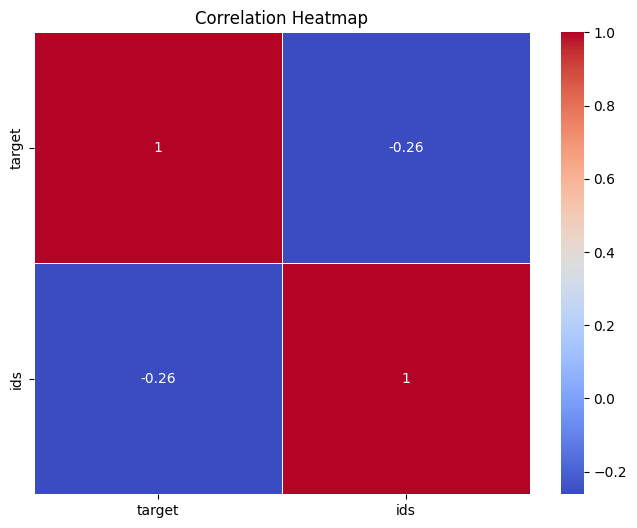

In [10]:
import seaborn as sns
# Tính ma trận tương quan
corr = df[['target', 'ids']].corr()

# Vẽ heatmap cho ma trận tương quan
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# Phân tích tương quan
Vì tập dữ liệu của không có nhiều đặc trưng dạng số ngoài target và ids, tương quan giữa các đặc trưng này có thể không mang nhiều ý nghĩa. Tuy nhiên,  có thể phân tích thêm các đặc trưng từ văn bản, như độ dài của tweet, từ khóa, hoặc tần suất sử dụng từ ngữ tiêu cực, tích cực trong văn bản. Nếu thêm các đặc trưng này, có thể mở rộng phân tích tương quan và trực quan hóa tốt hơn.

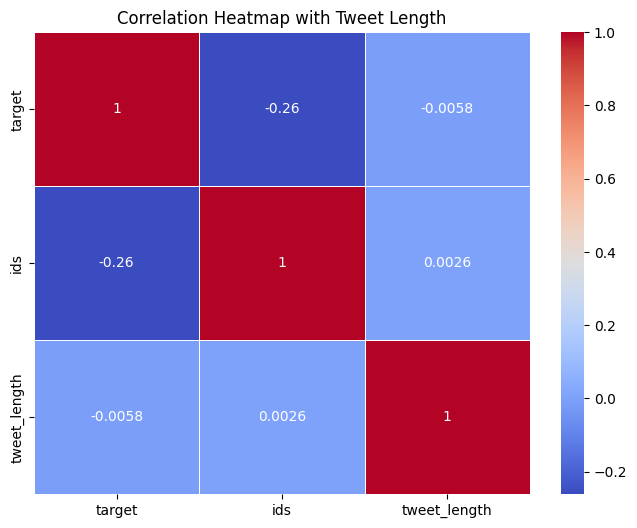

In [11]:
# Thêm cột độ dài của tweet
df['tweet_length'] = df['text'].apply(len)

# Tính lại ma trận tương quan với độ dài tweet
corr = df[['target', 'ids', 'tweet_length']].corr()

# Vẽ heatmap cho ma trận tương quan có thêm cột tweet_length
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap with Tweet Length')
plt.show()


# Giảm chiều dữ liệu

## Bước 1: Tiền Xử Lý Dữ Liệu
### **Loại Bỏ Cột Không Cần Thiết**: Chỉ giữ lại các cột cần thiết, trong trường hợp này có thể là cột text.

### **Xử Lý Văn Bản**:

- Chuyển đổi chữ hoa thành chữ thường: Giúp thống nhất các ký tự.
- Xóa các ký tự không cần thiết: Loại bỏ các ký tự đặc biệt, số, hoặc bất kỳ ký tự nào không hữu ích cho việc tóm tắt.
- Xóa Stopwords: Loại bỏ các từ không mang ý nghĩa (như "và", "là", "thì" trong tiếng Việt), nếu cần.
- Xóa URL: Nếu có liên kết trong văn bản, bạn có thể muốn loại bỏ chúng.
- Xóa Emoji và Ký tự Đặc biệt: Nếu bạn không cần thông tin cảm xúc, loại bỏ emoji và các ký tự đặc biệt.
### **Giảm Độ Dài Văn Bản**: Nếu văn bản quá dài, có thể cắt bớt văn bản để đảm bảo không vượt quá độ dài tối đa của mô hình BART.

## Bước 2: Giảm Chiều Dữ Liệu
Lựa Chọn Kỹ Thuật Giảm Chiều: Có nhiều phương pháp để giảm chiều dữ liệu, tùy thuộc vào mục tiêu của bạn:

- **LDA (Latent Dirichlet Allocation)**: Để trích xuất chủ đề.

- **Trực quan hóa các chủ đề với pyLDAvis**


In [12]:
!pip install rouge-score


  Preparing metadata (setup.py) ... - done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=752d5e50d214c9bcddcd2527957cb7075af71e9cc484c1c3e19c36e5aa8bd816
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [13]:
from transformers import BartTokenizer, BartForConditionalGeneration
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
import numpy as np
import re
from nltk.corpus import stopwords
from rouge_score import rouge_scorer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
# Kiểm tra dữ liệu NaN
print("Số lượng giá trị NaN trong mỗi cột:")
print(df.isnull().sum())

Số lượng giá trị NaN trong mỗi cột:
target          0
ids             0
date            0
flag            0
user            0
text            0
tweet_length    0
dtype: int64


In [15]:
# Xác định stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if isinstance(text, str):
        # Chuyển đổi chữ hoa thành chữ thường
        text = text.lower()
        
        # Xóa URL
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        
        # Xóa emoji và ký tự đặc biệt
        text = re.sub(r'[^\w\s]', '', text)  # Xóa ký tự đặc biệt
        text = re.sub(r'[\U0001F600-\U0001F64F]', '', text)  # Xóa emoji
        
        # Xóa số
        text = re.sub(r'\d+', '', text)
        
        # Xóa stopwords
        text = ' '.join(word for word in text.split() if word not in stop_words)
        
        # Xóa khoảng trắng thừa
        text = re.sub(r'\s+', ' ', text).strip()
        
        return text
    return np.nan

In [16]:
df.dropna(subset=['text'], inplace=True)

df = df.iloc[:10000]

df['text'] = df['text'].apply(preprocess_text)

# Hiển thị một số dòng để kiểm tra
print(df['text'].head())

print(df['text'].isna().sum())  

0    switchfoot thats bummer shoulda got david carr...
1    upset cant update facebook texting might cry r...
2    kenichan dived many times ball managed save re...
3                     whole body feels itchy like fire
4             nationwideclass behaving im mad cant see
Name: text, dtype: object
0


In [17]:
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large')

# Tokenization
inputs = tokenizer(list(df['text']), return_tensors='pt', padding=True, truncation=True, max_length=512)

# Bước 6: Đảm Bảo Định Dạng Đầu Vào
# inputs đã là tensor cho PyTorch, có thể in ra kích thước
print(inputs['input_ids'].shape)  # Kiểm tra kích thước của input_ids

# Bước 7: Chia Tập Dữ Liệu
# Giả sử bạn muốn chia dữ liệu với tỷ lệ 80-10-10 cho huấn luyện, kiểm tra và kiểm định
train_texts, temp_texts = train_test_split(df['text'], test_size=0.2, random_state=42)
val_texts, test_texts = train_test_split(temp_texts, test_size=0.5, random_state=42)

# Bước 8: Chuẩn Bị Dữ Liệu Đầu Vào
# Token hóa cho cả ba tập dữ liệu
train_inputs = tokenizer(list(train_texts), return_tensors='pt', padding=True, truncation=True, max_length=512)
val_inputs = tokenizer(list(val_texts), return_tensors='pt', padding=True, truncation=True, max_length=512)
test_inputs = tokenizer(list(test_texts), return_tensors='pt', padding=True, truncation=True, max_length=512)

# Kiểm tra kích thước của dữ liệu đầu vào
print("Training inputs shape:", train_inputs['input_ids'].shape)
print("Validation inputs shape:", val_inputs['input_ids'].shape)
print("Test inputs shape:", test_inputs['input_ids'].shape)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


torch.Size([10000, 63])
Training inputs shape: torch.Size([8000, 63])
Validation inputs shape: torch.Size([1000, 33])
Test inputs shape: torch.Size([1000, 37])


## LDA trong việc lấy chủ đề văn bản

### **Bước 1**: Xây dựng mô hình LDA từ tập văn bản
Trước tiên, bạn cần xây dựng mô hình LDA dựa trên tập văn bản đã được tiền xử lý của bạn. Điều này sẽ giúp chúng ta xác định các chủ đề trong dữ liệu.

- 1.1 Chuẩn bị dữ liệu để huấn luyện LDA
LDA yêu cầu văn bản được chuyển đổi thành dạng Bag-of-Words (BoW) và từ điển từ vựng.

In [18]:
from gensim.models import CoherenceModel
from gensim import corpora
from gensim.models import LdaModel

sample_texts = df['text'].head(1000)

# Chuyển từng văn bản thành danh sách các từ (tokenized)
texts_tokenized = [text.split() for text in sample_texts]

# Tạo từ điển (dictionary) từ các từ đã tokenized
dictionary = corpora.Dictionary(texts_tokenized)

# Chuyển đổi văn bản sang Bag-of-Words
corpus = [dictionary.doc2bow(text) for text in texts_tokenized]

# Huấn luyện mô hình LDA
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

In [19]:
def find_optimal_number_of_topics(texts_tokenized, dictionary, corpus, min_topics=5, max_topics=50, step=5):
    """
    Tìm số lượng chủ đề tối ưu dựa trên độ liên kết chủ đề.
    
    Args:
    - texts_tokenized: danh sách các văn bản đã được tokenized (danh sách từ).
    - dictionary: từ điển (Gensim Dictionary) được xây dựng từ văn bản.
    - corpus: Bag-of-Words corpus của các văn bản.
    - min_topics: số lượng chủ đề nhỏ nhất để thử nghiệm.
    - max_topics: số lượng chủ đề lớn nhất để thử nghiệm.
    - step: bước nhảy để thay đổi số lượng chủ đề trong mỗi lần lặp.
    
    Returns:
    - optimal_num_topics: số lượng chủ đề tối ưu.
    """
    
    coherence_values = []
    model_list = []
    for num_topics in range(min_topics, max_topics + 1, step):
        # Huấn luyện mô hình LDA với số lượng chủ đề hiện tại
        lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)
        model_list.append(lda_model)
        
        # Tính toán độ liên kết chủ đề (coherence score)
        coherence_model_lda = CoherenceModel(model=lda_model, texts=texts_tokenized, dictionary=dictionary, coherence='c_v')
        coherence_lda = coherence_model_lda.get_coherence()
        coherence_values.append(coherence_lda)
    
    # Tìm số chủ đề tối ưu (tương ứng với giá trị coherence lớn nhất)
    optimal_num_topics = min_topics + step * coherence_values.index(max(coherence_values))
    
    return optimal_num_topics, model_list[coherence_values.index(max(coherence_values))], coherence_values

# Kiểm tra mô hình và số chủ đề tối ưu
optimal_num_topics, optimal_lda_model, coherence_values = find_optimal_number_of_topics(
    texts_tokenized, dictionary, corpus, min_topics=5, max_topics=50, step=5
)

print(f"Số lượng chủ đề tối ưu: {optimal_num_topics}")

# In ra các chủ đề từ mô hình tối ưu
topics = optimal_lda_model.print_topics(num_topics=optimal_num_topics, num_words=10)
for topic in topics:
    print(topic)


Số lượng chủ đề tối ưu: 40
(0, '0.016*"one" + 0.012*"bad" + 0.009*"miss" + 0.009*"whole" + 0.009*"work" + 0.006*"cuz" + 0.006*"got" + 0.006*"lot" + 0.006*"home" + 0.006*"class"')
(1, '0.017*"like" + 0.013*"going" + 0.013*"think" + 0.009*"something" + 0.009*"whole" + 0.009*"body" + 0.009*"im" + 0.009*"stern" + 0.009*"better" + 0.009*"well"')
(2, '0.017*"back" + 0.017*"sick" + 0.013*"good" + 0.010*"went" + 0.010*"feel" + 0.010*"day" + 0.010*"time" + 0.007*"one" + 0.007*"wait" + 0.007*"days"')
(3, '0.028*"dont" + 0.019*"im" + 0.016*"get" + 0.010*"home" + 0.009*"sorry" + 0.009*"yawn" + 0.009*"good" + 0.009*"school" + 0.009*"cant" + 0.009*"want"')
(4, '0.015*"done" + 0.015*"got" + 0.012*"wont" + 0.010*"new" + 0.010*"ready" + 0.010*"like" + 0.010*"going" + 0.007*"start" + 0.005*"please" + 0.005*"exams"')
(5, '0.016*"one" + 0.016*"day" + 0.012*"sad" + 0.012*"going" + 0.012*"doesnt" + 0.012*"im" + 0.008*"back" + 0.008*"php" + 0.008*"get" + 0.008*"better"')
(6, '0.015*"much" + 0.011*"today" + 0

## **Bước 2**: Xác định chủ đề của từng câu
Sau khi đã có mô hình LDA, bạn có thể áp dụng mô hình này để xác định chủ đề cho từng câu trong sample_texts.

### **2.1 Lấy chủ đề của từng câu**
Dưới đây là hàm để xác định chủ đề của từng câu dựa trên mô hình LDA vừa xây dựng.

In [20]:
def get_topic_for_text(text, lda_model, dictionary):
    # Chuyển văn bản thành dạng Bag-of-Words (BoW)
    bow_vector = dictionary.doc2bow(text.split())
    
    # Nhận chủ đề và trọng số từ mô hình LDA
    topic_distribution = lda_model[bow_vector]
    
    # Lấy chủ đề có trọng số lớn nhất
    topic_id, topic_weight = max(topic_distribution, key=lambda x: x[1])

    return topic_id, topic_weight


# MODEL BART TRONG VIỆC TÓM TẮT VĂN BẢN

BART (Bidirectional and Auto-Regressive Transformers) là một mô hình mạnh mẽ được phát triển bởi Facebook AI, thích hợp cho các tác vụ xử lý ngôn ngữ tự nhiên như tóm tắt văn bản, dịch máy, và nhiều hơn nữa.

In [21]:
import pandas as pd
from transformers import BartForConditionalGeneration, BartTokenizer
import torch
from sklearn.metrics import f1_score
from rouge_score import rouge_scorer

In [22]:
model_name = 'facebook/bart-large-cnn'
# Tải mô hình và tokenizer của BART
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

In [23]:
def calculate_cosine_similarity(original_text, summary_text):
    """Tính độ tương đồng giữa văn bản gốc và tóm tắt sử dụng Cosine Similarity."""
    vectorizer = CountVectorizer().fit_transform([original_text, summary_text])
    vectors = vectorizer.toarray()
    
    # Tính toán cosine similarity
    cos_sim = cosine_similarity(vectors)[0][1]
    
    # Chuyển đổi sang phần trăm
    cos_sim_percentage = cos_sim * 100
    
    return cos_sim_percentage

In [24]:
def summarize_text(text, summary_length_ratio=0.3):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    
    original_word_count = len(text.split())
    max_length = max(1, int(original_word_count * summary_length_ratio))

    # Đảm bảo max_length ít nhất là 1
    if max_length < 1:
        max_length = 1

    # Tạo tóm tắt
    summary_ids = model.generate(
        inputs['input_ids'],
        max_length=max_length + 10,  
        min_length=1,
        length_penalty=2.0,
        num_beams=6,
        early_stopping=True
    )

    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    # Kiểm tra xem tóm tắt có hợp lệ không
    if not summary.strip() or len(summary.split()) < 1:  
        return "Tóm tắt không thể tạo ra.", original_word_count, 0

    summary_word_count = len(summary.split())
    return summary, original_word_count, summary_word_count


## Viết lại câu với nghĩa không đỏi nhưng số lượng từ ít hơn

In [25]:
from gensim.models import CoherenceModel

sample_texts = df['text'].head(1000)

# Chuyển từng văn bản thành danh sách các từ (tokenized)
texts_tokenized = [text.split() for text in sample_texts]

# Tạo từ điển (dictionary) từ các từ đã tokenized
dictionary = corpora.Dictionary(texts_tokenized)

# Chuyển đổi văn bản sang Bag-of-Words
corpus = [dictionary.doc2bow(text) for text in texts_tokenized]

In [26]:
def rewrite_text(text, length_reduction_ratio=0.7):
    """
    Viết lại câu với số lượng từ ít hơn câu gốc nhưng giữ nguyên ý nghĩa.
    length_reduction_ratio: tỷ lệ giảm độ dài câu (vd: 0.7 có nghĩa là 70% của độ dài ban đầu).
    """
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    
    original_word_count = len(text.split())
    # Số lượng từ của câu viết lại dựa trên tỷ lệ giảm
    max_length = max(1, int(original_word_count * length_reduction_ratio))

    # Đảm bảo max_length ít nhất là 1 từ
    if max_length < 1:
        max_length = 1

    rewrite_ids = model.generate(
        inputs['input_ids'],
        max_length=max_length + 10, 
        min_length=max_length,  
        length_penalty=1.0,  
        num_beams=6,  
        early_stopping=True
    )

    rewritten_text = tokenizer.decode(rewrite_ids[0], skip_special_tokens=True)

    # Kiểm tra xem câu viết lại có hợp lệ không
    if not rewritten_text.strip() or len(rewritten_text.split()) < 1:  
        return "Không thể tạo ra câu viết lại.", original_word_count, 0

    rewritten_word_count = len(rewritten_text.split())
    return rewritten_text, original_word_count, rewritten_word_count


In [27]:
def calculate_rouge_scores(original, summary):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(original, summary)
    return {
        'rouge1': scores['rouge1'].fmeasure,
        'rouge2': scores['rouge2'].fmeasure,
        'rougeL': scores['rougeL'].fmeasure
    }

In [28]:
results = []
summary_length_ratio = 0.3

for text in sample_texts:
    summary, original_word_count, summary_word_count = summarize_text(text, summary_length_ratio)
    is_summary_shorter = summary_word_count < original_word_count
    cosine_similarity_percentage = calculate_cosine_similarity(text, summary)
    rouge_scores = calculate_rouge_scores(text, summary)
    topic_id, topic_weight = get_topic_for_text(text, lda_model, dictionary)
    
    results.append({
        'original': text,
        'summary': summary,
        'original_word_count': original_word_count,
        'summary_word_count': summary_word_count,
        'is_summary_shorter': is_summary_shorter,
        'cosine_similarity_percentage': cosine_similarity_percentage,
        'rouge1': rouge_scores['rouge1'],
        'rouge2': rouge_scores['rouge2'],
        'rougeL': rouge_scores['rougeL'],
        'topic_id': topic_id,  
        'topic_weight': topic_weight
    })

# Chuyển đổi danh sách kết quả thành DataFrame
result_df = pd.DataFrame(results)

# Hiển thị kết quả
print(result_df)


                                              original  \
0    switchfoot thats bummer shoulda got david carr...   
1    upset cant update facebook texting might cry r...   
2    kenichan dived many times ball managed save re...   
3                     whole body feels itchy like fire   
4             nationwideclass behaving im mad cant see   
..                                                 ...   
995  dkoenigs thanks man im grateful feel unworthy ...   
996  t_wolfe miss u im totally comin back tho lastn...   
997     sniffinglue ohhh love ps im sad didnt get hang   
998                            somehow still end place   
999                          kisluvkis oh sad poor boy   

                                               summary  original_word_count  \
0            switchfoot thats bummer shoulda got david                    9   
1    upset cant update facebook texting might cry r...                   12   
2            kenichan dived many times ball managed to            

In [29]:
# Lọc các dòng mà 'is_summary_shorter' là True
shorter_summaries_df = result_df[result_df['is_summary_shorter'] == True]

# Tính trung bình của ROUGE-1, ROUGE-2, và ROUGE-L cho các bản tóm tắt ngắn hơn
average_rouge1_shorter = shorter_summaries_df['rouge1'].mean()
average_rouge2_shorter = shorter_summaries_df['rouge2'].mean()
average_rougeL_shorter = shorter_summaries_df['rougeL'].mean()

# Hiển thị kết quả
print(f"Trung bình ROUGE-1 (R1) cho các tóm tắt ngắn hơn: {average_rouge1_shorter *100:.4f}%")
print(f"Trung bình ROUGE-2 (R2) cho các tóm tắt ngắn hơn: {average_rouge2_shorter *100:.4f}%")
print(f"Trung bình ROUGE-L (RL) cho các tóm tắt ngắn hơn: {average_rougeL_shorter *100:.4f}%")


Trung bình ROUGE-1 (R1) cho các tóm tắt ngắn hơn: 75.8289%
Trung bình ROUGE-2 (R2) cho các tóm tắt ngắn hơn: 71.5532%
Trung bình ROUGE-L (RL) cho các tóm tắt ngắn hơn: 75.8289%


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


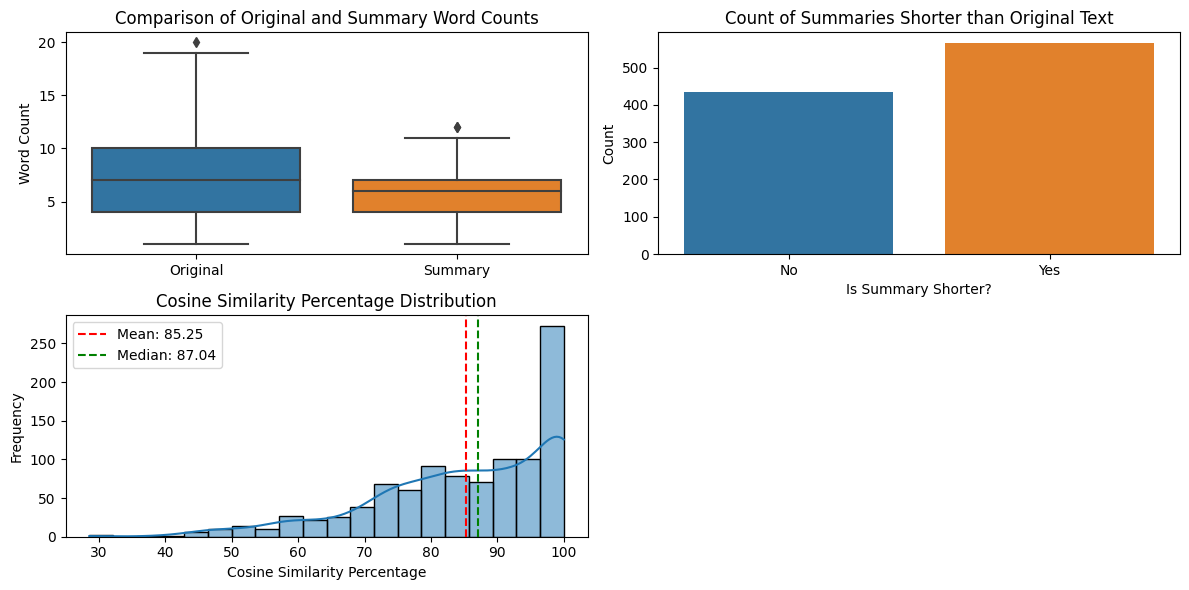

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử result_df là DataFrame chứa kết quả của bạn

# Vẽ biểu đồ so sánh số lượng từ gốc và số lượng từ tóm tắt
plt.figure(figsize=(12, 6))

# Biểu đồ 1: Original Word Count vs Summary Word Count
plt.subplot(2, 2, 1)
sns.boxplot(data=result_df[['original_word_count', 'summary_word_count']])
plt.title('Comparison of Original and Summary Word Counts')
plt.ylabel('Word Count')
plt.xticks([0, 1], ['Original', 'Summary'])

# Biểu đồ 2: Tỉ lệ tóm tắt ngắn hơn văn bản gốc
plt.subplot(2, 2, 2)
sns.countplot(x='is_summary_shorter', data=result_df)
plt.title('Count of Summaries Shorter than Original Text')
plt.xlabel('Is Summary Shorter?')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])

# Biểu đồ 3: Tương đồng Cosine
plt.subplot(2, 2, 3)
sns.histplot(result_df['cosine_similarity_percentage'], bins=20, kde=True)
plt.title('Cosine Similarity Percentage Distribution')
plt.xlabel('Cosine Similarity Percentage')
plt.ylabel('Frequency')

# Thêm chú thích vào biểu đồ phân phối
mean_cosine = result_df['cosine_similarity_percentage'].mean()
median_cosine = result_df['cosine_similarity_percentage'].median()

plt.axvline(mean_cosine, color='r', linestyle='--', label=f'Mean: {mean_cosine:.2f}')
plt.axvline(median_cosine, color='g', linestyle='--', label=f'Median: {median_cosine:.2f}')
plt.legend()

# Tùy chỉnh kích thước biểu đồ
plt.tight_layout()
plt.show()


In [31]:
# Sử dụng phương pháp viết lại câu thay vì tóm tắt
results_rewrites = []
length_reduction_ratio = 0.7  # Tỷ lệ viết lại là 70% số lượng từ của câu gốc

for text in sample_texts:
    rewritten_text, original_word_count, rewritten_word_count = rewrite_text(text, length_reduction_ratio)
    is_rewrite_shorter = rewritten_word_count < original_word_count
    cosine_similarity_percentage = calculate_cosine_similarity(text, rewritten_text)
    rouge_scores = calculate_rouge_scores(text, rewritten_text)
    topic_id, topic_weight = get_topic_for_text(text, lda_model, dictionary)
    
    results_rewrites.append({
        'original': text,
        'rewritten_text': rewritten_text,
        'original_word_count': original_word_count,
        'rewritten_word_count': rewritten_word_count,
        'is_rewrite_shorter': is_rewrite_shorter,
        'cosine_similarity_percentage': cosine_similarity_percentage,
        'rouge1': rouge_scores['rouge1'],
        'rouge2': rouge_scores['rouge2'],
        'rougeL': rouge_scores['rougeL'],
        'topic_id': topic_id,  
        'topic_weight': topic_weight
    })

# Chuyển đổi danh sách kết quả thành DataFrame
result_df_rewrite = pd.DataFrame(results_rewrites)

# Hiển thị kết quả
print(result_df_rewrite)


                                              original  \
0    switchfoot thats bummer shoulda got david carr...   
1    upset cant update facebook texting might cry r...   
2    kenichan dived many times ball managed save re...   
3                     whole body feels itchy like fire   
4             nationwideclass behaving im mad cant see   
..                                                 ...   
995  dkoenigs thanks man im grateful feel unworthy ...   
996  t_wolfe miss u im totally comin back tho lastn...   
997     sniffinglue ohhh love ps im sad didnt get hang   
998                            somehow still end place   
999                          kisluvkis oh sad poor boy   

                                        rewritten_text  original_word_count  \
0    switchfoot thats bummer shoulda got david carr...                    9   
1    upset cant update facebook texting might cry r...                   12   
2    kenichan dived many times ball managed save re...            

In [32]:
# Lọc các dòng mà 'is_summary_shorter' là True
shorter_rewrite_df = result_df_rewrite[result_df_rewrite['is_rewrite_shorter'] == True]

# Tính trung bình của ROUGE-1, ROUGE-2, và ROUGE-L cho các bản tóm tắt ngắn hơn
average_rouge1_shorter = shorter_rewrite_df['rouge1'].mean()
average_rouge2_shorter = shorter_rewrite_df['rouge2'].mean()
average_rougeL_shorter = shorter_rewrite_df['rougeL'].mean()

# Hiển thị kết quả
print(f"Trung bình ROUGE-1 (R1) cho các tóm tắt ngắn hơn: {average_rouge1_shorter *100:.4f}%")
print(f"Trung bình ROUGE-2 (R2) cho các tóm tắt ngắn hơn: {average_rouge2_shorter *100:.4f}%")
print(f"Trung bình ROUGE-L (RL) cho các tóm tắt ngắn hơn: {average_rougeL_shorter *100:.4f}%")


Trung bình ROUGE-1 (R1) cho các tóm tắt ngắn hơn: 84.9127%
Trung bình ROUGE-2 (R2) cho các tóm tắt ngắn hơn: 82.0730%
Trung bình ROUGE-L (RL) cho các tóm tắt ngắn hơn: 84.8765%


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


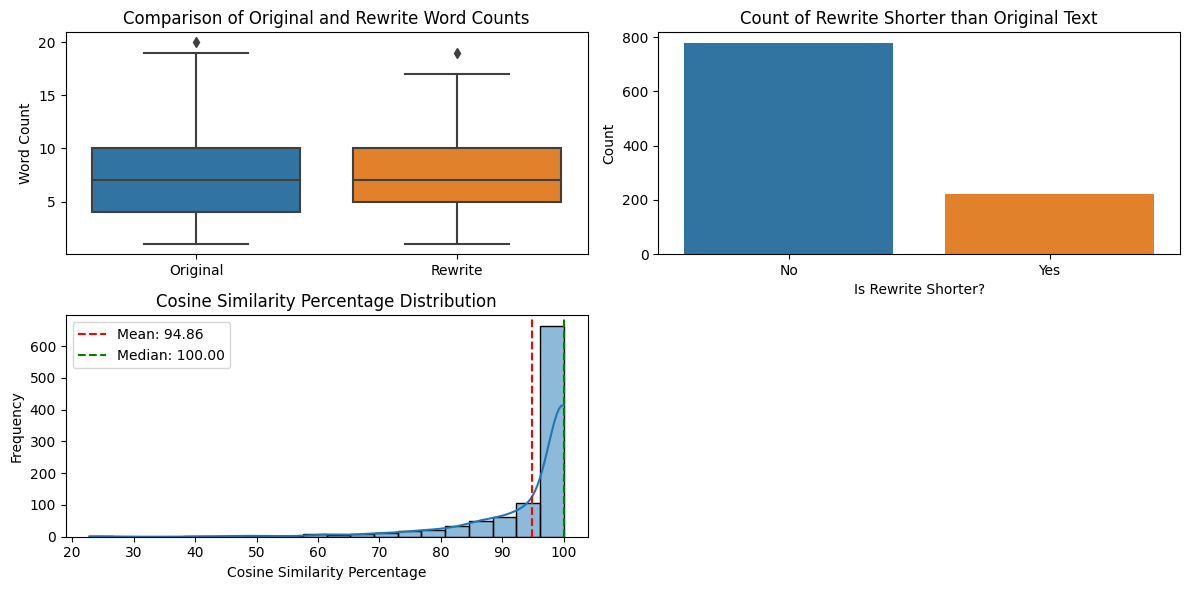

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử result_df là DataFrame chứa kết quả của bạn

# Vẽ biểu đồ so sánh số lượng từ gốc và số lượng từ tóm tắt
plt.figure(figsize=(12, 6))

# Biểu đồ 1: Original Word Count vs Summary Word Count
plt.subplot(2, 2, 1)
sns.boxplot(data=result_df_rewrite[['original_word_count', 'rewritten_word_count']])
plt.title('Comparison of Original and Rewrite Word Counts')
plt.ylabel('Word Count')
plt.xticks([0, 1], ['Original', 'Rewrite'])

# Biểu đồ 2: Tỉ lệ tóm tắt ngắn hơn văn bản gốc
plt.subplot(2, 2, 2)
sns.countplot(x='is_rewrite_shorter', data=result_df_rewrite)
plt.title('Count of Rewrite Shorter than Original Text')
plt.xlabel('Is Rewrite Shorter?')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])

# Biểu đồ 3: Tương đồng Cosine
plt.subplot(2, 2, 3)
sns.histplot(result_df_rewrite['cosine_similarity_percentage'], bins=20, kde=True)
plt.title('Cosine Similarity Percentage Distribution')
plt.xlabel('Cosine Similarity Percentage')
plt.ylabel('Frequency')

# Thêm chú thích vào biểu đồ phân phối
mean_cosine = result_df_rewrite['cosine_similarity_percentage'].mean()
median_cosine = result_df_rewrite['cosine_similarity_percentage'].median()

plt.axvline(mean_cosine, color='r', linestyle='--', label=f'Mean: {mean_cosine:.2f}')
plt.axvline(median_cosine, color='g', linestyle='--', label=f'Median: {median_cosine:.2f}')
plt.legend()

# Tùy chỉnh kích thước biểu đồ
plt.tight_layout()
plt.show()


In [34]:
# Lưu kết quả tóm tắt thành file CSV
result_df.to_csv('/kaggle/working/result_summary.csv', index=False)

# Lưu kết quả viết lại thành file CSV
result_df_rewrite.to_csv('/kaggle/working/result_rewrite.csv', index=False)
